# 1. Data Gathering and Data Cleaning

## Problem Statement 
What make Top TED Talk Speaker stand out?

In [32]:
# web scraping 
from requests import get
from bs4 import BeautifulSoup
import pickle
import re
import string

# scrap transcript data from https://www.ted.com/playlists/171/the_most_popular_talks_of_all
def url_to_transcript(url):
    print(url)
    response = get(url)
    soup = BeautifulSoup(response.text,'html.parser')
    text = [p.text for p in soup.find_all('div',class_='Grid__cell flx-s:1 p-r:4')]
    
    # combine the whole script 
    combined_text = ' '.join(text)
    combined_text = ' '.join(combined_text.split())
    
    # apply data cleaning technique
    cleaned_text = combined_text.lower()
    cleaned_text = re.sub('\[.*?\]', '', cleaned_text)
    cleaned_text = re.sub('[%s]' % re.escape(string.punctuation), '', cleaned_text)
    cleaned_text = re.sub('\w*\d\w*', '', cleaned_text)
    
    return cleaned_text

# URL of most popular ted talk of all time 
urls = [
    'https://www.ted.com/talks/sir_ken_robinson_do_schools_kill_creativity/transcript?referrer=playlist-the_most_popular_talks_of_all',
    'https://www.ted.com/talks/amy_cuddy_your_body_language_may_shape_who_you_are/transcript?referrer=playlist-the_most_popular_talks_of_all',
    'https://www.ted.com/talks/mary_roach_10_things_you_didn_t_know_about_orgasm/transcript?referrer=playlist-the_most_popular_talks_of_all',
    'https://www.ted.com/talks/brene_brown_the_power_of_vulnerability/transcript?referrer=playlist-the_most_popular_talks_of_all',
    'https://www.ted.com/talks/simon_sinek_how_great_leaders_inspire_action/transcript?referrer=playlist-the_most_popular_talks_of_all',
    'https://www.ted.com/talks/julian_treasure_how_to_speak_so_that_people_want_to_listen/transcript?referrer=playlist-the_most_popular_talks_of_all',
    'https://www.ted.com/talks/jill_bolte_taylor_my_stroke_of_insight/transcript?referrer=playlist-the_most_popular_talks_of_all',
    'https://www.ted.com/talks/james_veitch_this_is_what_happens_when_you_reply_to_spam_email/transcript?referrer=playlist-the_most_popular_talks_of_all',
    'https://www.ted.com/talks/cameron_russell_looks_aren_t_everything_believe_me_i_m_a_model/transcript?referrer=playlist-the_most_popular_talks_of_all',
    'https://www.ted.com/talks/dan_pink_the_puzzle_of_motivation/transcript?referrer=playlist-the_most_popular_talks_of_all',
    'https://www.ted.com/talks/susan_cain_the_power_of_introverts/transcript?referrer=playlist-the_most_popular_talks_of_all',
    'https://www.ted.com/talks/pamela_meyer_how_to_spot_a_liar/transcript?referrer=playlist-the_most_popular_talks_of_all'
]
speakers = ['Ken Robinson','Amy Cuddy','Mary Roach','Brene Brown','Simon Sinek','Julian Treasure',
           'Jill Taylor','James Veitch','Cameron Rusell','Dan Pink','Susan Cain','Pamela Mayer']

In [67]:
transcripts = [url_to_transcript(u) for u in urls]

https://www.ted.com/talks/sir_ken_robinson_do_schools_kill_creativity/transcript?referrer=playlist-the_most_popular_talks_of_all
https://www.ted.com/talks/amy_cuddy_your_body_language_may_shape_who_you_are/transcript?referrer=playlist-the_most_popular_talks_of_all
https://www.ted.com/talks/mary_roach_10_things_you_didn_t_know_about_orgasm/transcript?referrer=playlist-the_most_popular_talks_of_all
https://www.ted.com/talks/brene_brown_the_power_of_vulnerability/transcript?referrer=playlist-the_most_popular_talks_of_all
https://www.ted.com/talks/simon_sinek_how_great_leaders_inspire_action/transcript?referrer=playlist-the_most_popular_talks_of_all
https://www.ted.com/talks/julian_treasure_how_to_speak_so_that_people_want_to_listen/transcript?referrer=playlist-the_most_popular_talks_of_all
https://www.ted.com/talks/jill_bolte_taylor_my_stroke_of_insight/transcript?referrer=playlist-the_most_popular_talks_of_all
https://www.ted.com/talks/james_veitch_this_is_what_happens_when_you_reply_to_

In [34]:
# Pickle files for later use

# Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(speakers):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)


mkdir: transcripts: File exists


In [35]:
# Load pickled files
data = {}
for i, c in enumerate(speakers):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

data.keys()

dict_keys(['Ken Robinson', 'Amy Cuddy', 'Mary Roach', 'Brene Brown', 'Simon Sinek', 'Julian Treasure', 'Jill Taylor', 'James Veitch', 'Cameron Rusell', 'Dan Pink', 'Susan Cain', 'Pamela Mayer'])

In [36]:
# convert dictionary to dataframe (CORPUS FORMAT)
import pandas as pd

format1 = pd.DataFrame([data]).transpose()
format1.columns = ['transcript']
format1 = format1.sort_index()
format1

,transcript
Amy Cuddy,so i want to start by offering you a free note...
Brene Brown,so ill start with this a couple years ago an e...
Cameron Rusell,hi my name is cameron russell and for the last...
Dan Pink,i need to make a confession at the outset here...
James Veitch,a few years ago i got one of those spam emails...
Jill Taylor,i grew up to study the brain because i have a ...
Julian Treasure,the human voice its the instrument we all play...
Ken Robinson,good morning how are you audience good its bee...
Mary Roach,alright im going to show you a couple of image...
Pamela Mayer,okay now i dont want to alarm anybody in this ...


In [37]:
# convert it to Document term matrix (MATRIX FORMAT)
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(format1.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = format1.index
data_dtm

,aberration,abilities,ability,able,abnormalities,abolishing,abraham,absolute,absolutely,abstract,...,youd,youll,young,youre,youth,youthful,youve,zero,zone,zoom
Amy Cuddy,0,0,0,1,0,0,0,0,0,0,...,0,0,0,26,0,0,1,0,0,0
Brene Brown,0,0,1,2,0,0,0,0,3,0,...,0,0,1,7,0,0,0,0,0,0
Cameron Rusell,0,0,0,1,0,0,0,0,0,0,...,1,1,3,2,1,0,2,0,0,0
Dan Pink,1,1,0,0,0,0,0,0,1,0,...,0,0,0,2,0,1,1,0,0,1
James Veitch,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,0,0,0
Jill Taylor,0,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
Julian Treasure,0,0,1,0,0,0,0,1,0,0,...,0,0,0,5,0,0,1,0,0,0
Ken Robinson,0,0,2,0,0,0,0,0,0,1,...,3,1,0,8,0,0,0,0,0,0
Mary Roach,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
Pamela Mayer,0,0,0,0,0,0,0,0,0,0,...,0,2,0,11,0,0,5,0,0,0


# 2. Explolatory Data Analysis

## Most common words

In [68]:
# Find the top 30 words said by each comedian
data = data_dtm.transpose()
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))


In [39]:
# Print the top 15 words said by each speaker
for speakers, top_words in top_dict.items():
    print(speakers)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Amy Cuddy
like, people, youre, really, want, minutes, feel, going, know, power, powerful, im, dont, thats
---
Brene Brown
im, people, laughter, know, like, just, going, vulnerability, said, think, really, thats, connection, love
---
Cameron Rusell
like, model, laughter, look, say, just, people, dont, question, right, got, want, uncomfortable, im
---
Dan Pink
work, want, time, candle, people, rewards, laughter, science, im, autonomy, dont, problem, reward, like
---
James Veitch
laughter, said, solomon, im, email, applause, like, going, gold, time, day, ive, use, know
---
Jill Taylor
im, like, brain, right, hemisphere, left, got, just, moment, laughter, felt, body, woo, ive
---
Julian Treasure
like, people, really, la, thats, ba, listen, world, time, going, think, voice, actually, somebody
---
Ken Robinson
laughter, think, said, education, people, shes, did, way, say, dont, things, school, want, know
---
Mary Roach
laughter, said, orgasm, semen, like, okay, know, just, going, dead, men, 

In [40]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(background_color="white", colormap="Dark2",max_font_size=150, random_state=42)

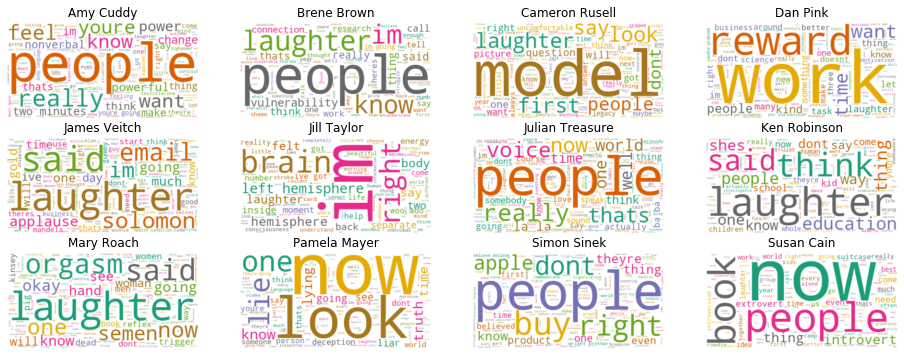

In [44]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Amy Cuddy','Brene Brown','Cameron Rusell','Dan Pink','James Veitch','Jill Taylor',
           'Julian Treasure','Ken Robinson','Mary Roach','Pamela Mayer','Simon Sinek','Susan Cain']

# Create subplots for each speaker
for index, speaker in enumerate(data.columns):
    wc.generate(format1.transcript[speaker])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Finding
As we have seen from the visualization that the most common words used by speakers are 'People' and 'Laughter'.
I assume that the Top Speaker of TED Talk mainly cover topic about Human Bonding and Hapiness. We can prove this by applying NLP Technique 

## Words per minute

In [45]:
# Find the number of unique words that each speaker uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['speaker', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,speaker,unique_words
4,James Veitch,317
6,Julian Treasure,375
2,Cameron Rusell,382
1,Brene Brown,546
5,Jill Taylor,546
10,Simon Sinek,557
8,Mary Roach,597
0,Amy Cuddy,627
3,Dan Pink,660
7,Ken Robinson,669


In [57]:
# Calculate the words per minute of each speaker

# Find the total number of words that a speaker uses
total_list = []
for speaker in data.columns:
    totals = sum(data[speaker])
    total_list.append(totals)
    
# the video run times
run_times = [21, 20, 9, 18, 10, 18, 10, 19, 17, 19, 18, 19]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,speaker,unique_words,total_words,run_times,words_per_minute
4,James Veitch,317,591,10,59.100000
8,Mary Roach,597,1026,17,60.352941
1,Brene Brown,546,1252,20,62.600000
5,Jill Taylor,546,1129,18,62.722222
11,Susan Cain,742,1300,19,68.421053
6,Julian Treasure,375,688,10,68.800000
7,Ken Robinson,669,1324,19,69.684211
3,Dan Pink,660,1258,18,69.888889
10,Simon Sinek,557,1261,18,70.055556
0,Amy Cuddy,627,1478,21,70.380952


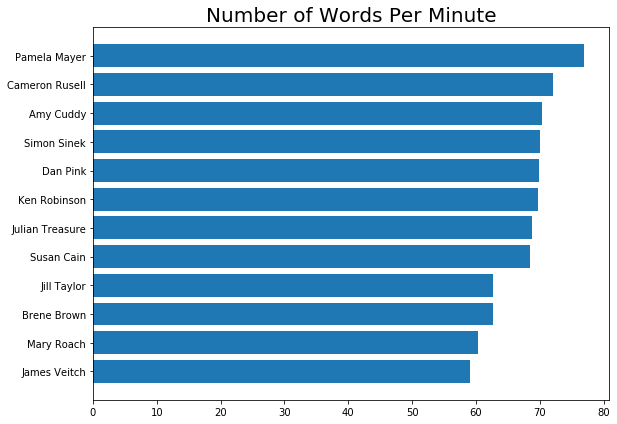

In [71]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.speaker)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Finding
According to research that the average person speaks at somewhere between 125 and 150 words per minute. The finding shows that the TED Talk Top Speaker speak much slower than the average. This is make sense since its always better to speak more slowly to make sure the audience can really get the message

# 3. NLP Technique

## Topic Modeling

In [59]:
from gensim import matutils, models
import scipy.sparse

tdm = data_dtm.transpose()
tdm.head()

,Amy Cuddy,Brene Brown,Cameron Rusell,Dan Pink,James Veitch,Jill Taylor,Julian Treasure,Ken Robinson,Mary Roach,Pamela Mayer,Simon Sinek,Susan Cain
aberration,0,0,0,1,0,0,0,0,0,0,0,0
abilities,0,0,0,1,0,0,0,0,0,0,0,0
ability,0,1,0,0,0,1,1,2,0,0,1,0
able,1,2,1,0,0,3,0,0,0,0,3,0
abnormalities,0,0,0,0,0,0,0,0,1,0,0,0


In [60]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [63]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
#cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [64]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.013*"people" + 0.013*"like" + 0.009*"im" + 0.009*"just" + 0.008*"going" + 0.007*"know" + 0.007*"laughter" + 0.006*"really" + 0.006*"thats" + 0.006*"dont"'),
 (1,
  '0.021*"laughter" + 0.013*"said" + 0.006*"think" + 0.006*"like" + 0.006*"people" + 0.005*"work" + 0.005*"im" + 0.005*"dont" + 0.005*"time" + 0.005*"want"')]

### Most common topic by Top TED Talk Speaker
Topic 1: People <br>
Topic 2: Laughter/Hapiness <br>

This is make sense since at the end of the day, things that matter the most for all of us is human bonding and hapiness. This is pretty suprising finding to me personally because I assumed that The Top TED Talk topics maybe about Personal Growth, Career or Innovation